In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm
from sklearn.metrics import accuracy_score
import altair as alt
import matplotlib.pyplot as plt

In [2]:
# Membaca file "IMDB_review_labels.txt"
with open("IMDB_review_labels.txt", 'r') as file:
  lines = file.readlines()

In [3]:
# Memisahkan teks dan label
reviews = []
sentiments = []
for line in lines:
  review, sentiment = line.strip().split('\t|')
  reviews.append(review)
  sentiments.append(int(sentiment))  # Mengubah label menjadi integer (0 atau 1)


In [4]:
# Membuat DataFrame
data = {'Review': reviews, 'Sentiment': sentiments}
df = pd.DataFrame(data)


In [5]:
# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Sentiment'], test_size=0.2, random_state=42)


In [6]:
# Inisialisasi dan latih model SVM
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

clf = svm.SVC(kernel='linear')
clf.fit(X_train_tfidf, y_train)


SVC(kernel='linear')

In [7]:
# Prediksi pada data uji dan hitung akurasi
y_pred = clf.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)


In [8]:
# Menampilkan 25 contoh ulasan positif
print("25 Contoh Ulasan Positif:")
for review in df[df['Sentiment'] == 1]['Review'].sample(25).values:
    print(review)
    print("-----")

# Menampilkan 25 contoh ulasan negatif
print("\n25 Contoh Ulasan Negatif:")
for review in df[df['Sentiment'] == 0]['Review'].sample(25).values:
    print(review)
    print("-----")

25 Contoh Ulasan Positif:
Tom Wilkinson broke my heart at the end... and everyone else's judging by the amount of fumbling for hankies and hands going up to faces among males and females alike.  
-----
Great movie!  
-----
Here, in The Wind and the Lion, we see a wonderful rendering of America's own Imperial age.  
-----
A good film by a great director!  
-----
If there was ever an indication of a writer and a director's ability to meld two highly volatile temperaments into a seamless union of creativity, then this is it!  
-----
But "Tiny Toons" kept the 90's vibe and delivered one of the most popular, funny, and underrated cartoons ever created.  
-----
Trumbull on I LOVE LUCY).  
-----
This is one of the best Italian thrillers of the early 70's.  
-----
That was funny.  
-----
Actually, the graphics were good at the time.  
-----
The cast is always entertaining as usual.  
-----
But this movie really got to me.  
-----
Lange had become a great actress.  
-----
See both films if you 

In [9]:
# Menghitung jumlah ulasan positif dan negatif
sentiment_counts = df['Sentiment'].value_counts()


In [10]:
# Membuat DataFrame untuk visualisasi
chart_data = pd.DataFrame({'Sentiment': ['Positif', 'Negatif'], 'Jumlah': sentiment_counts.values})


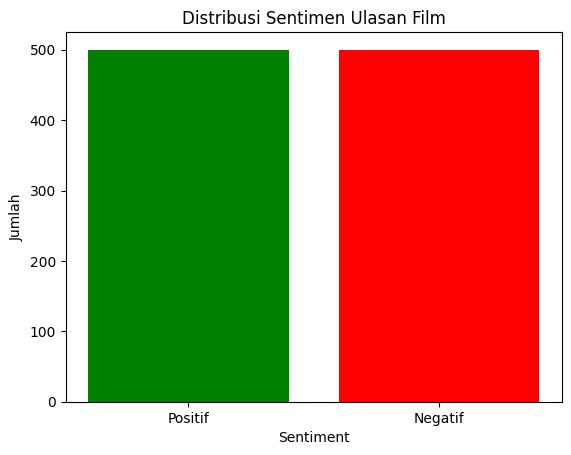

In [11]:
# Membuat diagram batang
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Jumlah')
plt.title('Distribusi Sentimen Ulasan Film')
plt.xticks(sentiment_counts.index, ['Positif', 'Negatif'])

# Menampilkan diagram
plt.show()

In [25]:
# Membuat list kata kunci untuk saran membangun
keywords = ['plot', 'acting', 'directing', 'script', 'character', 'dialog', 'cinematography', 'editing', 'ending', 'effect', 'musik','entertain','good']


In [27]:
# Mengklasifikasikan ulasan menjadi Konstruktif atau Non-Konstruktif
df['Type'] = ['Konstruktif' if any(keyword in review.lower() for keyword in keywords) else 'Non-Konstruktif' for review in df['Review']]


In [28]:
# Menghitung jumlah ulasan untuk setiap jenis
type_counts = df['Type'].value_counts()

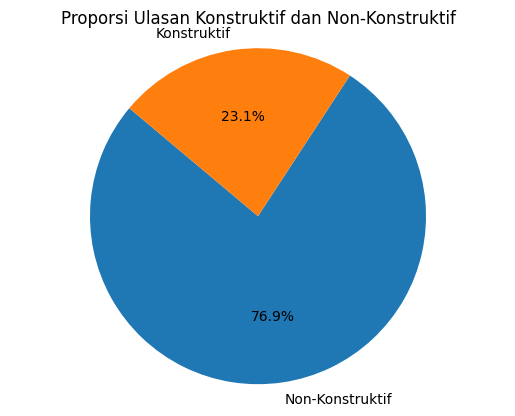

In [29]:
# Membuat diagram lingkaran (pie chart)
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proporsi Ulasan Konstruktif dan Non-Konstruktif')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Menampilkan diagram
plt.show()

### **KESIMPULANNYA**
File "IMDB_review_labels.txt" berisi 1000 ulasan film dengan sentimen seimbang, 500 positif (label 1) dan 500 negatif (label 0).

Dataset ini dapat digunakan untuk melatih model pembelajaran mesin untuk analisis sentimen, seperti yang ditunjukkan pada contoh penggunaan Support Vector Machine (SVM) dengan akurasi 75%.

Dataset yang berisi ulasan film dengan label sentimen (positif atau negatif) biasanya digunakan untuk mengembangkan beberapa aplikasi berikut:

1.  **Analisis Sentimen Otomatis:** Tujuan utama dari dataset ini adalah untuk melatih model machine learning, seperti SVM (Support Vector Machine), untuk secara otomatis mengklasifikasikan ulasan baru sebagai positif atau negatif. Hal ini berguna untuk berbagai keperluan, termasuk:
    *   **Monitoring Reputasi Merek:** Perusahaan dapat melacak sentimen publik terhadap produk atau layanan mereka.
    *   **Analisis Umpan Balik Pelanggan:** Bisnis dapat menganalisis umpan balik pelanggan untuk memahami apa yang disukai dan tidak disukai pelanggan.
    *   **Rekomendasi Produk:** Sistem rekomendasi dapat menggunakan sentimen ulasan untuk memberikan rekomendasi yang lebih baik kepada pengguna.
2.  **Penelitian Linguistik Komputasional:** Dataset ini dapat digunakan oleh peneliti untuk mempelajari bagaimana bahasa digunakan untuk mengungkapkan sentimen, serta untuk mengembangkan teknik baru dalam pemrosesan bahasa alami (natural language processing/NLP).
3.  **Pembelajaran Mesin:** Dataset ini dapat digunakan untuk melatih berbagai model pembelajaran mesin lainnya, seperti Naive Bayes, regresi logistik, atau jaringan saraf, untuk tugas klasifikasi teks.
4.  **Pembuatan Dataset yang Lebih Besar:** Dataset ini dapat digabungkan dengan dataset lain yang serupa untuk membuat dataset yang lebih besar dan lebih beragam, yang dapat meningkatkan kinerja model machine learning.

Secara keseluruhan, dataset ulasan film berlabel sentimen adalah sumber daya yang berharga untuk berbagai aplikasi dalam analisis sentimen, penelitian bahasa, dan pembelajaran mesin.